# Scatterplot Smoothers

We will show how to use various scatterplot smoother classes in the MLTools `gam` (generalized additive models) module to fit a curves through a 2D scatterplot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from mltools.gam import BinSmoother
from mltools.visualization import func_plot

In [2]:
# Set NumPy random number generator seed for replicability
np.random.seed(100)

## Create Some Artificial Data

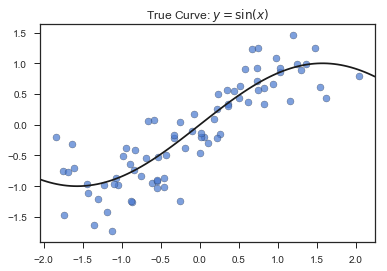

In [3]:
n = 80

# Actual model
x = np.random.normal(loc=0, scale=1, size=n)
e = np.random.normal(loc=0, scale=(1 / 3), size=n)
y = np.sin(x) + e

# Scatter plot of the raw data
plt.figure()
plt.scatter(x, y, c="b", alpha=0.7, edgecolor="k")

# Plot of the true curve
func_plot(np.sin, num=100, c="k")

plt.title("True Curve: $y = \sin(x)$")
plt.show()
plt.close()

## Bin Smoother

A *bin smoother* partitions predictor values into disjoint and exhaustive regions, called *bins*, and estimates the response by the average training data response in each bin.

In [4]:
%time
model = BinSmoother(n_bins=5).fit(x, y)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


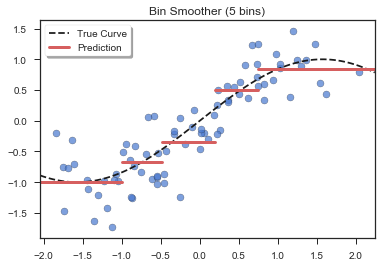

In [5]:
plt.figure()

# Scatter plot of the observations
plt.scatter(x, y, c="b", alpha=0.7, edgecolor="k")

# Plot of the true curve
func_plot(np.sin, ls="--", num=100, c="k", label="True Curve")

# Plot the regression line
model.fit_plot(lw=3, c="r", label="Prediction")

plt.legend(loc="best", frameon=True, shadow=True)
plt.title(f"Bin Smoother ({model.n_bins} bins)")
plt.show()
plt.close()